# Статистический анализ данных / Python
## Задание 4

**Правила:**

* Дедлайн **8 декаюря 23:59**.
* Выполненную работу нужно отправить на почту ` mipt.stats@yandex.ru`, указав тему письма `"[MADE19] Фамилия Имя - задание 4"`. Квадратные скобки обязательны. Если письмо дошло, придет ответ от автоответчика.
* Прислать нужно ноутбук и его pdf-версию (без архивов), которую можно сделать с помощью печати в файл через инструменты браузера.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. 
* Разделяйте код вычислений и отрисовки графиков. Так будет удобнее вам и проверяющим.


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.sandbox.stats.multicomp import multipletests
from tqdm import tqdm_notebook


__________________
### Задача 1. (3 балла)

С помощью критерия хи-квадрат проверьте, действительно ли код `sps.poisson(mu=5).rvs(size=1000)` генерирует выборку размера 1000 из пуассоновского распределения с параметром 5. 

*Указания*
1. Не забудьте учесть условия применимости критерия хи-квадрат;
2. Для вычисления плотности воспользуйтесь `sps.poisson(mu=5).pmf`;
3. Для подсчета количества элементов в разбиении на множества воспользуйтесь `np.unique(sample, return_counts=True)`;
4. Не нужно писать сколь-либо универсальный код, который одним нажатием кнопки проверяет гипотезу с учетом всех условий применимости критерия. Расписывайте код поэтапно, на каждый логический этап свой код для *конкретной* реализации выборки. Так проще реализовать, и проще проверять.

In [2]:
n=1000

In [3]:
#генерим выборку
x = sps.poisson(mu=5).rvs(size=n)

#считаем частоты значений
unique_values, freq = np.unique(x, return_counts=True)

#оцениваем ожидаемые частоты
expected_freq = [sps.poisson(mu=5).pmf(k)*n for k in unique_values]

sample = pd.DataFrame()
sample['value'] = unique_values
sample['freq'] = freq
sample['expected_freq'] = expected_freq

In [4]:
sample

,value,freq,expected_freq
0,0,5,6.737947
1,1,39,33.689735
2,2,87,84.224337
3,3,134,140.373896
4,4,181,175.467370
5,5,170,175.467370
6,6,135,146.222808
7,7,96,104.444863
8,8,76,65.278039
9,9,41,36.265577


In [5]:
#Значения больше 11 объединямв один бакет
critical = 12

In [6]:
#статистика по объединённом бакету
new_expected_freq = sample.loc[sample['value']>=critical, 'expected_freq'].sum()
new_freq = sample.loc[sample['value']>=critical, 'freq'].sum()
new_value='{}+'.format(critical)

additional_sample = pd.DataFrame({'value': [new_value], 'freq':[new_freq], 'expected_freq':[new_expected_freq]})

#выкидываем из старого сэмпла исключаемые редкие значения
ok_sample = sample.loc[sample['value']<critical]

#добавляем новый баке в сэмлп
new_sample = ok_sample.append(additional_sample, ignore_index=True)

In [7]:
new_sample

,value,freq,expected_freq
0,0,5,6.737947
1,1,39,33.689735
2,2,87,84.224337
3,3,134,140.373896
4,4,181,175.467370
5,5,170,175.467370
6,6,135,146.222808
7,7,96,104.444863
8,8,76,65.278039
9,9,41,36.265577


In [8]:
#Подстраховка
if np.min(new_sample['expected_freq'])<5:
    raise BaseException('Не выполнен критерий применимости')

In [9]:
#проверка критерия хи-вадрат
sps.chisquare(new_sample['freq'], new_sample['expected_freq'])

Power_divergenceResult(statistic=11.833845471638142, pvalue=0.4591144142599325)

**Вывод:**

Значение p-value высокое, оснований отвергать нулевую гипотезу о принадлежности полученной выборки распределению Пуассона с параметром 5 нет

__________________
### Задача 2. (5 баллов)


Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine">`wine dataset`</a>, взяв все колонки, кроме `Class`.

In [10]:
columns_ = ['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 
           'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline' ]

data = pd.read_csv('data/wine.data', header=None, names = columns_).drop(['class'], axis=1)

FileNotFoundError: [Errno 2] File b'data/wine.data' does not exist: b'data/wine.data'

In [11]:
data.head()

NameError: name 'data' is not defined

Для каждого параметра нарисуте Q-Q plot. Для наглядности и экономии места рисуйте графики в несколько столбцов, используя `plt.subplot`.

In [28]:
data.shape

(178, 13)

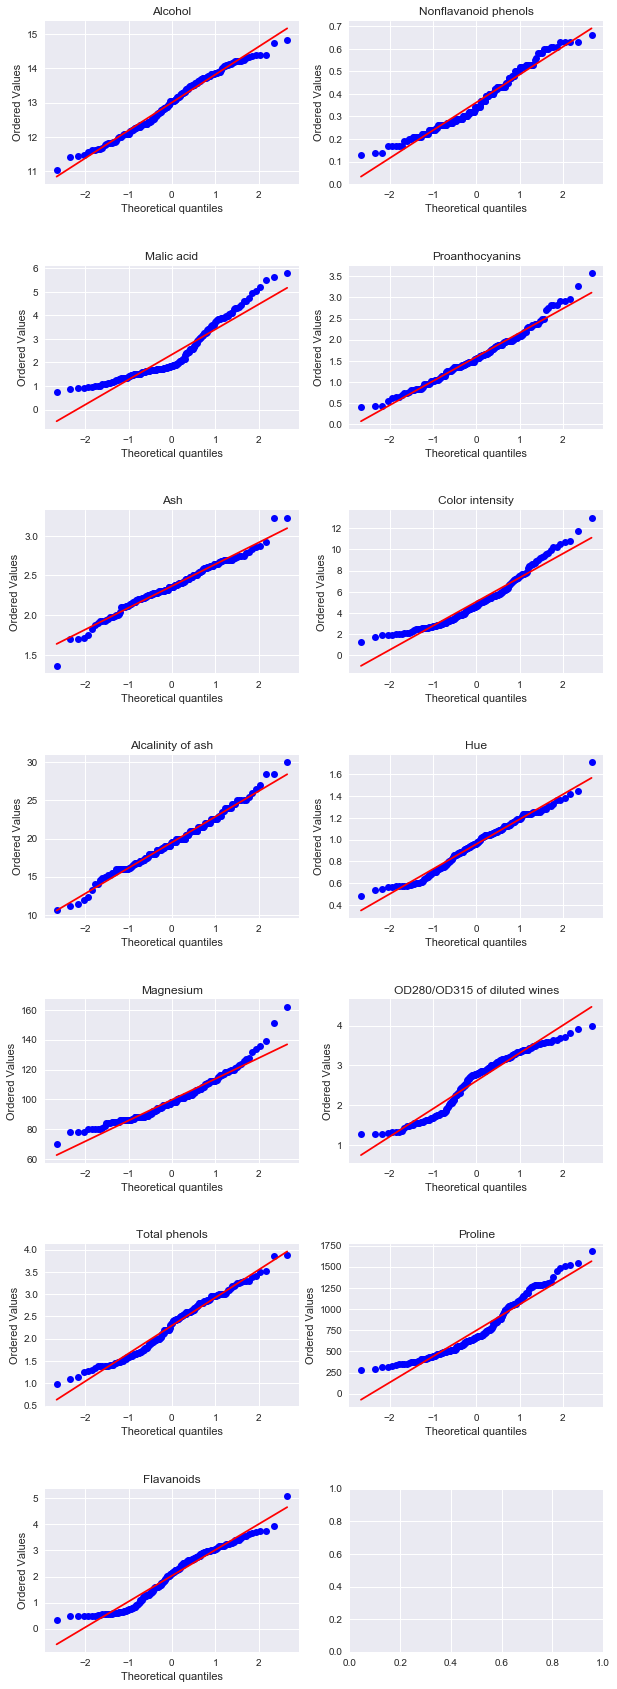

In [73]:
fig, axes = plt.subplots(7,2, figsize=[10,30], gridspec_kw={'wspace':0.2, 'hspace':0.5} )
for i in range(len(data.columns)):
    col = i//7
    row = i%7
    #print(row, col)
    sps.probplot(data[data.columns[i]], plot=axes[row, col])
    axes[row, col].set_title(data.columns[i])
    
plt.show()   

Для каких параметров можно говорить об их нормальности и почему?

**Ответ:** <...>

Проверьте нормальность каждого параметра статистическими критериями. Прежде чем выполнить следующую часть задачи, ответьте на вопросы.

Для каждого параметра используйте несколько критериев проверки нормальности. Какие критерии вы будете использовать?

**Ответ:** Критерий Шапиро-Уилка, Критерий хи-квадрат, критерий Колмогорова-Смирнова

Результаты критериев нужно обработать с помощью *одной* процедуры множественной проверки гипотез для всех параметров и всех критериев сразу. Почему так нужно делать?

**Ответ:** различные критерии могут оценивать схожесть распределений по различным свойствам, поэтому нужно проверять по нескольким критериям и проводить множественную проверку гипотез

Какой метод для контроля FWER стоит применить и почему?

**Ответ:** Методы Бонферрони и Холма, т.к. они универсальны и не зависят от связей между статистиками. Так же попробую метод Шидака для интереса

Как понять из результата процедуры множественной проверки гипотез, нормальность каких параметров следует отклонить?

**Ответ:** Отклонить гипотезу о нормальности тех параметров, где хотя бы по одному критерию гипотеза была отклонена

Если нормальность не отклоняется, что можно сказать про выборку (ответ в презентации с лекции)? 

**Ответ:** <...>

Реализуйте данную схему. Предварительно соберите p-value всех критериев в таблицу. 

Функция `multipletests` принимает только одномерные массивы, поэтому для полученной `numpy`-таблицы нужно воспользоваться методом `ravel`. Результат нужно собрать обратно в таблицу с помощью метода `reshape`, которому нужно передать размерности таблицы. Для наглядности сделайте таблицу с помощью `pandas.DataFrame`. В качестве названий строк используйте названия переменных, а названий столбцов --- используемые критерии.

In [77]:
x = data['Hue'].values

In [79]:
shapiro_stat = sps.shapiro(x)

In [ ]:
<...>

Для каких параметров нормальность не отвергается?

**Ответ:** <...>